In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import api_twitter
from config import api_twitter_secret
from config import api_access_token
from config import api_access_token_secret
# Your Twitter API Keys
consumer_key = api_twitter
consumer_secret = api_twitter_secret
access_token = api_access_token
access_token_secret = api_access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [72]:
#Let's keep our twitter targets in a list
target_list = ["@bbc", "@cnn", "@NYTimes", "@FoxNews", "@cbs"]
comp_dict = {}
pos_dict = {}
neg_dict = {}
neu_dict = {}

In [73]:
#Just to make sure it's working....
#tweets = api.user_timeline(target_list[0])
#print(tweets)
#tweets[0]["text"]

In [74]:
'''Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.'''


#let's create a function series of functions to do this.
def compoundanalysis(handle):
    print("Running compound analysis for {}".format(handle))
    compound_list = []
    oldest_tweet = None
    for x in range (0,5):
        tweet_search = api.user_timeline(handle, max_id = oldest_tweet)
        for tweet in tweet_search:
            results = analyzer.polarity_scores(tweet["text"])
            compound_list.append(results["compound"])
            oldest_tweet = tweet["id"]
    return(compound_list)

#Damn, ok, that wasn't so bad. That return really opens up some good stuff. Let's create 3 more for other returns
    
def positiveanalysis(handle):
    print("Running positive analysis for {}".format(handle))
    positive_list = []
    oldest_tweet = None
    for x in range (0,5):
        tweet_search = api.user_timeline(handle, max_id = oldest_tweet)
        for tweet in tweet_search:
            results = analyzer.polarity_scores(tweet["text"])
            positive_list.append(results["pos"])
            oldest_tweet = tweet["id"]
    return(positive_list)

def negativeanalysis(handle):
    print("Running negative analysis for {}".format(handle))
    negative_list = []
    oldest_tweet = None
    for x in range (0,5):
        tweet_search = api.user_timeline(handle, max_id = oldest_tweet)
        for tweet in tweet_search:
            results = analyzer.polarity_scores(tweet["text"])
            negative_list.append(results["neg"])
            oldest_tweet = tweet["id"]
    return(negative_list)

def neutralanalysis(handle):
    print("Running neutral analysis for {}".format(handle))
    neutral_list = []
    oldest_tweet = None
    for x in range (0,5):
        tweet_search = api.user_timeline(handle, max_id = oldest_tweet)
        for tweet in tweet_search:
            results = analyzer.polarity_scores(tweet["text"])
            neutral_list.append(results["neu"])
            oldest_tweet = tweet["id"]
    return(neutral_list)

In [75]:
#Then we just do this, and build a dictionary! Ain't no thing.
for handle in target_list:
    comp_dict["comp_" + handle] = compoundanalysis(handle)
    pos_dict["pos_"+handle] = positiveanalysis(handle)
    neg_dict["neg_"+handle] = negativeanalysis(handle)
    neu_dict["neu_"+handle] = neutralanalysis(handle)

Running compound analysis for @bbc
Running positive analysis for @bbc
Running negative analysis for @bbc
Running neutral analysis for @bbc
Running compound analysis for @cnn
Running positive analysis for @cnn
Running negative analysis for @cnn
Running neutral analysis for @cnn
Running compound analysis for @NYTimes
Running positive analysis for @NYTimes
Running negative analysis for @NYTimes
Running neutral analysis for @NYTimes
Running compound analysis for @FoxNews
Running positive analysis for @FoxNews
Running negative analysis for @FoxNews
Running neutral analysis for @FoxNews
Running compound analysis for @cbs
Running positive analysis for @cbs
Running negative analysis for @cbs
Running neutral analysis for @cbs


In [78]:
#Turn it all into a dataframe by taking a list of those dictionaries

#So, ok, this was a total pain in the ass. There MUST be a better way of doing this, but I'm tired and can't think of it.
tweet_df = pd.DataFrame(comp_dict) #.append(pos_dict["pos_@bbc"]) #.append(pos_dict)
for handle in target_list:
    tweet_df["pos_" + handle] = pos_dict["pos_" + handle]
    tweet_df["neg_" + handle] = neg_dict["neg_" + handle]
    tweet_df["neu_" + handle] = neu_dict["neu_" + handle]
print(tweet_df)
tweet_df.to_csv("tweet_sentiment.csv")

    comp_@FoxNews  comp_@NYTimes  comp_@bbc  comp_@cbs  comp_@cnn  pos_@bbc  \
0         -0.3182         0.0000     0.0000     0.7096     0.7717     0.000   
1         -0.3818         0.4215     0.4939     0.6467    -0.6249     0.314   
2         -0.6908        -0.8779     0.2500     0.5562    -0.5574     0.147   
3         -0.4019        -0.1280     0.0000     0.4199    -0.4215     0.000   
4          0.8271        -0.3612     0.0000     0.6696    -0.2732     0.000   
5          0.5267         0.5719    -0.2263     0.0000     0.2023     0.000   
6          0.0000         0.5719     0.0000     0.3612    -0.5719     0.000   
7         -0.7650         0.6597     0.0000     0.0000     0.2500     0.000   
8         -0.7506         0.8591    -0.2023     0.0000     0.5859     0.000   
9          0.5106         0.7964     0.8750     0.0000     0.3400     0.393   
10         0.0000        -0.1779     0.2732     0.0000    -0.4588     0.512   
11        -0.6705        -0.6124    -0.0772     0.58

In [82]:
comp_df = pd.DataFrame(comp_dict)
comp_df = comp_df.rename(columns = {"comp_@FoxNews" : "Fox News", "comp_@NYTimes" : "New York Times", "comp_@bbc": "BBC", "comp_@cbs": "CBS", "comp_@cnn":"CNN"})


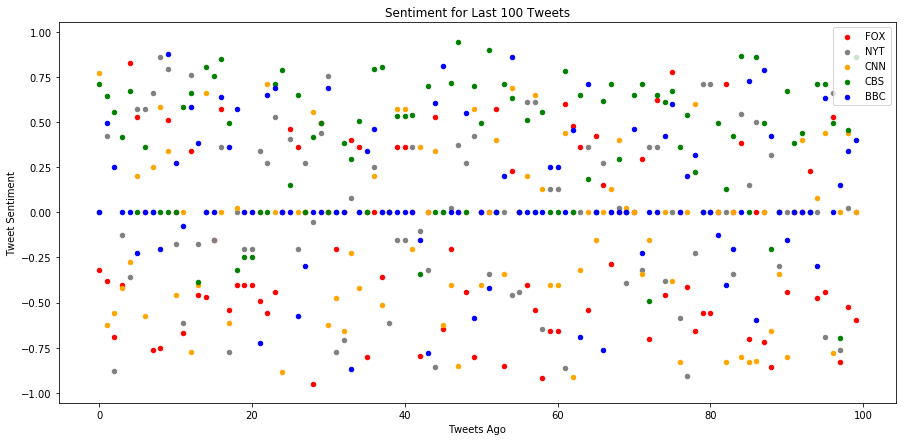

In [115]:
#ax_fox = comp_df.plot.scatter(x = index, y='Fox News', color='red')
comp_df_scatter = comp_df.reset_index()
#comp_df_scatter.head()
ax_fox = comp_df_scatter.plot(kind = "scatter", x= "index",  y= "Fox News", c = "red", label = "FOX", figsize = (15,7))
ax_NYT = comp_df_scatter.plot(kind = "scatter", x= "index",  y= "New York Times", c = "grey", ax = ax_fox, label = "NYT")
ax_CNN = comp_df_scatter.plot(kind = "scatter", x= "index",  y= "CNN", c = "orange", ax = ax_fox, label = "CNN")
ax_CBS = comp_df_scatter.plot(kind = "scatter", x= "index",  y= "CBS", c = "green", ax = ax_fox, label = "CBS")
ax_BBC = comp_df_scatter.plot(kind = "scatter", x= "index",  y= "BBC", c = "blue", ax = ax_fox, label = "BBC")
ax_fox.set_ylabel("Tweet Sentiment")
ax_fox.set_xlabel("Tweets Ago")
ax_fox.set_title("Sentiment for Last 100 Tweets")
plt.show()
plt.savefig('sentiment_scatter.png')

#df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

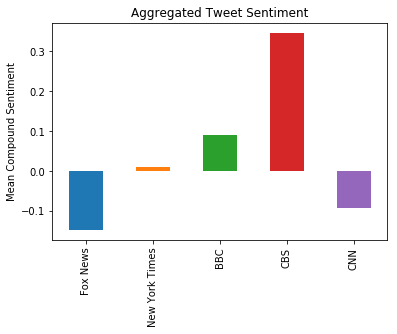

In [116]:
avg_df = comp_df.mean(0)
bar_plot = avg_df.plot(kind = "bar")
bar_plot.set_ylabel("Mean Compound Sentiment")
bar_plot.set_title("Aggregated Tweet Sentiment")
plt.savefig('sentiment_bar.png')
